In [1]:
# Set working directory

import os

os.chdir ('E:\\Renata Limited\\Data Scientist\\Assignment')

In [2]:
# Import necessary packages

import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage  # Need to use pip install scipy 

import matplotlib.pyplot as plt   # Need to use pip install matplotlib


In [3]:
# Import data set

df = pd.read_csv('New CSV file (Sheet 1).csv')


In [4]:
df.head(6)

,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,BU79786,Christine,Dhaka,F,Married,49,56274
1,QZ44356,Susan,Rajshahi,F,Single,34,0
2,AI49188,Margaret,Khulna,F,Married,29,48767
3,WW63253,David,Barishal,M,Married,46,0
4,HB64268,Peter,Mymensingh,M,Single,26,43836
5,OC83172,Judith,Sylhet,F,Married,27,62902


In [5]:
# Remove the 'ID' column

df = df.drop('ID',
             axis=1)

# Encoding categorical variables

df['Gender'] = df['Gender'].map({'M': 1, 'F': 2})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 1, 'Married': 2, 'Divorced': 3})
df['Division'] = df['Division'].map({'Barishal':1,
                                    'Chattogram':2,
                                    'Dhaka':3,
                                    'Khulna':4,
                                    'Mymensingh':5,
                                    'Rajshahi':6,
                                    'Rangpur':7,
                                    'Sylhet':8})

In [6]:
df.head(6)

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,3,2,2,49,56274
1,Susan,6,2,1,34,0
2,Margaret,4,2,2,29,48767
3,David,1,1,2,46,0
4,Peter,5,1,1,26,43836
5,Judith,8,2,2,27,62902


In [7]:
from sklearn.cluster import KMeans   # Need to use pip install scikit-learn

In [8]:
# Extract the 'Division'

DIV = df[['Division']]

In [9]:
# K-means clustering

kmeans = KMeans(n_clusters=4,
                n_init=10)  # Explicitly set n_init=10

kmeans.fit(df[['Division']])

KMeans(n_clusters=4, n_init=10)

In [10]:
# Extract cluster number

labels = kmeans.labels_

In [11]:
# Add the cluster column

df['Cluster'] = labels

In [12]:
df.head(6)

,Customer Name,Division,Gender,MaritalStatus,Age,Income,Cluster
0,Christine,3,2,2,49,56274,1
1,Susan,6,2,1,34,0,2
2,Margaret,4,2,2,29,48767,1
3,David,1,1,2,46,0,3
4,Peter,5,1,1,26,43836,2
5,Judith,8,2,2,27,62902,0


In [13]:
# Hierarchical clustering

linked = linkage(df[['Cluster']],
                 method='complete')  # Complete linkage method was used

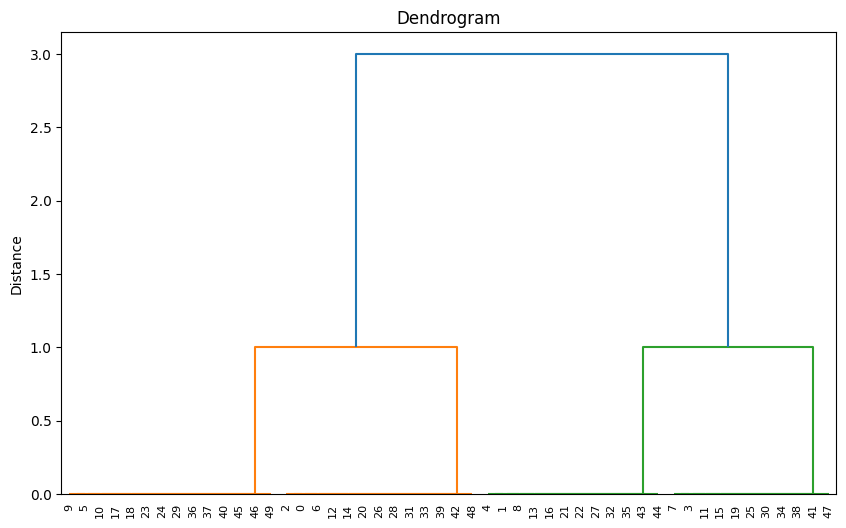

In [14]:
# Plot the dendrogram

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.xlabel('')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()